In [3]:
import datetime
import time
import math
import numpy as np
import pandas as pd
import sys

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import f_regression

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Movie Rating
# Using other users' Rankings: If other user has given high rating for a similar movie for which subject has given high rating.
# 1. This is called as Collaborative Filtering
# 2. Other one is Content Filtering where we use the content/ information of a movie user liked to suggest the next movie.
# The best is to combining both the approaches.

In [5]:
# Clustering : Unsupervised learning. Works best with large datasets.
# 1. Hierarchical
    # Agglomerative/ additive
    # Divisive
# 2. K-means

In [6]:
# Distance between points,
    # Euclidean
    # Manhatten
    
# Distance between clusters,
    # Minimum distance
    # Maximum distance
    # Centroid distance
    
# Cluster Dendrogram
    # Height of vertical lines represents distance between points or clusters
    # Data points are listed along bottom.
    # Draw a horizontal line across the dendrogram and the number of vertical lines it crosses is the number of clusters.

In [7]:
movies = pd.read_csv('movieLens.txt',sep="|", header= None)

In [8]:
movies.columns = ["ID", "Title", "ReleaseDate", "VideoReleaseDate", "IMDB", "Unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "FilmNoir", "Horror", "Musical", 
"Mystery", "Romance", "SciFi", "Thriller", "War", "Western"]

In [9]:
movies.head()

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
# import csv
# with open('movieLens.txt') as movies:                                                                                          
#     movie_reader = csv.reader(movies, delimiter='|')
#     for movies in movie_reader:
#         print(movies)

In [11]:
movies.count()

ID                  1682
Title               1682
ReleaseDate         1681
VideoReleaseDate       0
IMDB                1679
Unknown             1682
Action              1682
Adventure           1682
Animation           1682
Childrens           1682
Comedy              1682
Crime               1682
Documentary         1682
Drama               1682
Fantasy             1682
FilmNoir            1682
Horror              1682
Musical             1682
Mystery             1682
Romance             1682
SciFi               1682
Thriller            1682
War                 1682
Western             1682
dtype: int64

In [12]:
movies.describe()

,ID,VideoReleaseDate,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
movies = movies.drop('ID', axis=1).drop('ReleaseDate', axis=1).drop('VideoReleaseDate', axis=1).drop('IMDB', axis=1)

In [14]:
movies.head()

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [15]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = movies[movies.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)
duplicateRowsDF.count()

Duplicate Rows except first occurrence based on all columns are :
                               Title  Unknown  Action  Adventure  Animation  \
267               Chasing Amy (1997)        0       0          0          0   
302               Ulee's Gold (1997)        0       0          0          0   
347        Desperate Measures (1998)        0       0          0          0   
499             Fly Away Home (1996)        0       0          1          0   
669            Body Snatchers (1993)        0       0          0          0   
679        Kull the Conqueror (1997)        0       1          1          0   
864            Ice Storm, The (1997)        0       0          0          0   
880               Money Talks (1997)        0       1          0          0   
1002           That Darn Cat! (1997)        0       0          0          0   
1256  Designated Mourner, The (1997)        0       0          0          0   
1605                 Deceiver (1997)        0       0          0 

Title          18
Unknown        18
Action         18
Adventure      18
Animation      18
Childrens      18
Comedy         18
Crime          18
Documentary    18
Drama          18
Fantasy        18
FilmNoir       18
Horror         18
Musical        18
Mystery        18
Romance        18
SciFi          18
Thriller       18
War            18
Western        18
dtype: int64

In [16]:
movies = movies.drop_duplicates()

In [17]:
movies.count()

Title          1664
Unknown        1664
Action         1664
Adventure      1664
Animation      1664
Childrens      1664
Comedy         1664
Crime          1664
Documentary    1664
Drama          1664
Fantasy        1664
FilmNoir       1664
Horror         1664
Musical        1664
Mystery        1664
Romance        1664
SciFi          1664
Thriller       1664
War            1664
Western        1664
dtype: int64

In [18]:
# X = framingham.loc[:, framingham.columns != 'TenYearCHD']
# Y = framingham.loc[:, framingham.columns == 'TenYearCHD']

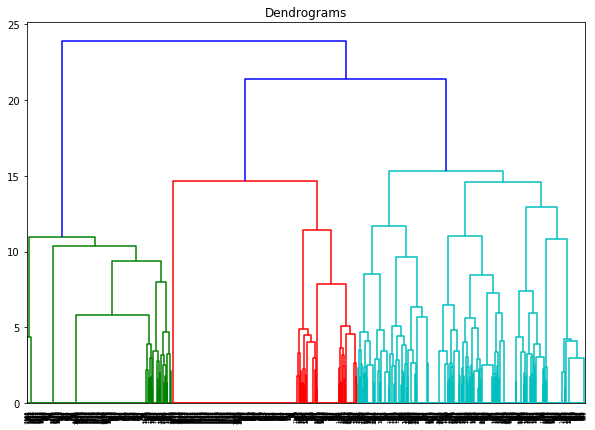

In [19]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(movies.loc[:, movies.columns != 'Title'], method='ward'))

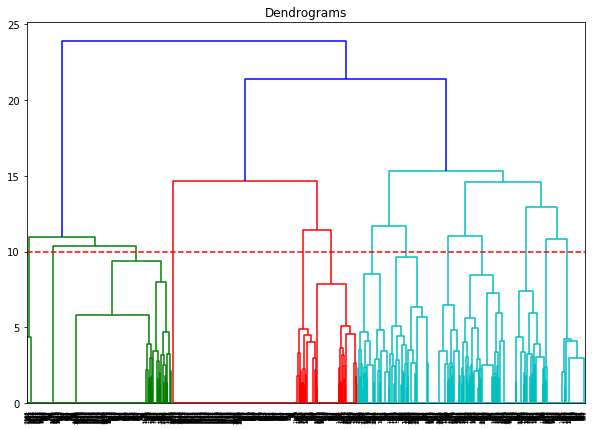

In [20]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(movies.loc[:, movies.columns != 'Title'], method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
pred = cluster.fit_predict(movies.loc[:, movies.columns != 'Title'])

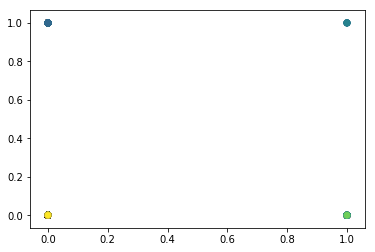

In [22]:

#plt.figure(figsize=(10, 7))  
plt.scatter( movies["Crime"], movies["Adventure"], c=cluster.labels_) 

In [23]:
pred

array([6, 3, 7, ..., 5, 0, 9])

In [24]:
cluster = list(pred)

In [25]:
dict = {'cluster':cluster}
df = pd.DataFrame(dict)


In [26]:
df.shape

(1664, 1)

In [27]:
movies_final = movies

In [28]:
movies_final['cluster'] = df

In [29]:
movies_final[movies_final.cluster==6.0]

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,cluster
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
7,Babe (1995),0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,6.0
62,"Santa Clause, The (1994)",0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
70,"Lion King, The (1994)",0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6.0
71,"Mask, The (1994)",0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,6.0
90,"Nightmare Before Christmas, The (1993)",0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,6.0
93,Home Alone (1990),0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
94,Aladdin (1992),0,0,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,6.0
98,Snow White and the Seven Dwarfs (1937),0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6.0
101,"Aristocats, The (1970)",0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0


## Predict Heart Attack - K means

# Recitation6- Seeing the Big Picture: Segmenting Images to Create Data

In [30]:
flower = pd.read_csv('flower.csv', header= None)

In [31]:
flower.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.099138,0.112069,0.133621,0.137931,0.137931,0.137931,0.129310,0.116379,0.112069,0.120690,...,0.034483,0.025862,0.025862,0.030172,0.025862,0.025862,0.017241,0.021552,0.021552,0.030172
1,0.099138,0.107759,0.116379,0.137931,0.133621,0.129310,0.116379,0.103448,0.099138,0.107759,...,0.034483,0.025862,0.025862,0.030172,0.025862,0.017241,0.017241,0.012931,0.021552,0.034483
2,0.103448,0.112069,0.120690,0.120690,0.125000,0.120690,0.103448,0.103448,0.107759,0.112069,...,0.038793,0.034483,0.038793,0.034483,0.025862,0.017241,0.008621,0.012931,0.021552,0.038793
3,0.103448,0.116379,0.116379,0.120690,0.116379,0.107759,0.107759,0.103448,0.112069,0.116379,...,0.047414,0.043103,0.051724,0.051724,0.038793,0.025862,0.021552,0.017241,0.034483,0.060345
4,0.103448,0.107759,0.112069,0.112069,0.112069,0.112069,0.112069,0.116379,0.116379,0.125000,...,0.064655,0.056034,0.060345,0.060345,0.047414,0.034483,0.025862,0.030172,0.060345,0.077586


In [32]:
flower.shape

(50, 50)

In [33]:
flower_np = flower.to_numpy()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [35]:
n_colors = 2

In [36]:
w, h = original_shape = tuple(flower_np.shape)

In [37]:
w,h

(50, 50)

In [38]:
image_array = np.reshape(flower_np, (w * h, 1))

In [39]:
flower_np.shape

(50, 50)

In [40]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1500]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

Fitting model on a small sub-sample of the data
done in 0.025s.


In [41]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [42]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

Predicting color indices on the full image (k-means)
done in 0.002s.


In [43]:
labels.shape

(2500,)

In [44]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [45]:
#codebook_random = shuffle(image_array, random_state=0)[:n_colors]

In [46]:
#codebook_random.shape

In [47]:
#codebook_random

In [48]:
image_array.shape

(2500, 1)

In [49]:
# print("Predicting color indices on the full image (random)")
# t0 = time()
# labels_random = pairwise_distances_argmin(codebook_random,
#                                           image_array,
#                                           axis=0)
# print("done in %0.3fs." % (time() - t0))

In [50]:
# labels_random.shape

In [51]:
kmeans.cluster_centers_.shape[1]

1

In [52]:
d=1
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

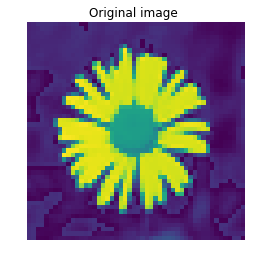

In [53]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image ')
plt.imshow(flower_np)

In [54]:
kmeans.cluster_centers_

array([[0.09999164],
       [0.83791082]])

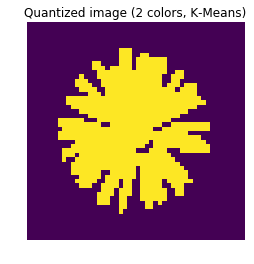

In [55]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (2 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

# Segmenting Images- MRI Image

In [56]:
healthy = pd.read_csv('healthy.csv', header=None)

In [57]:
healthy_np = healthy.to_numpy()

In [58]:
healthy.size

365636

In [59]:
# Create a line array, the lazy way
X = healthy_np.reshape((-1, 1))

In [60]:
X.shape

(365636, 1)

In [61]:
healthy.shape

(566, 646)

In [62]:
healthy_np.shape

(566, 646)

In [63]:
n_clusters = 5
# Define the k-means clustering problem
k_m = KMeans(n_clusters=n_clusters, n_init=4)

In [64]:
# Solve the k-means clustering problem
k_m.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=4, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
# Get the coordinates of the clusters centres as a 1D array
values = k_m.cluster_centers_.squeeze()

In [66]:
values

array([0.10956294, 0.3124493 , 0.02070763, 0.48177191, 0.18817138])

In [67]:
# Get the label of each point
labels = k_m.labels_

In [68]:
labels.shape

(365636,)

In [69]:
# Create the segmented array from labels and values
img_segm = np.choose(labels, values)

In [70]:
img_segm.shape

(365636,)

In [71]:
# Reshape the array as the original image
img_segm.shape = healthy_np.shape

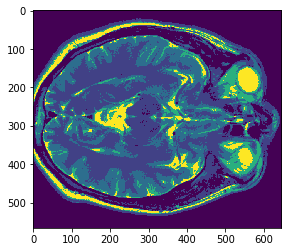

In [72]:
plt.imshow(img_segm)

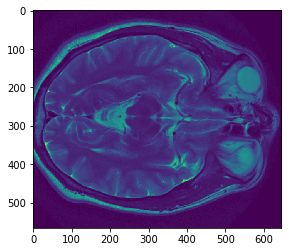

In [73]:
plt.imshow(healthy)

In [74]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

In [75]:
tumor = pd.read_csv('tumor.csv')

In [77]:
# tumor.shape = healthy.shape

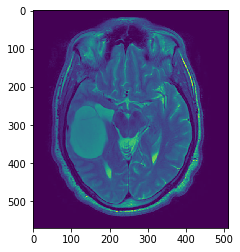

In [78]:
plt.imshow(tumor)